#Plotting on the Bloch Sphere

###Contents

In [2]:
%matplotlib inline
import numpy as np
from pylab import *
from qutip import *

##Introduction

When studying the dynamics of a two-level system, it is often convent to visualize the state of the system by plotting the state-vector or density matrix on the Bloch sphere.  In QuTiP, we have created two different classes to allow for easy creation and manipulation of data sets, both vectors and data points, on the Bloch sphere.  The `Bloch` class, uses Matplotlib to render the Bloch sphere, where as `Bloch3d` uses the Mayavi rendering engine to generate a more faithful 3D reconstruction of the Bloch sphere.  Here we will only address the `Bloch` class as it is the most widely used of the two, by a large margin, and should be the default selection of the user.  The Mayavi library is also only available under Python 2.7.

##The Bloch Class

In QuTiP, creating a Bloch sphere is accomplished by calling:

In [3]:
b = Bloch()

that will load an instance of the `Bloch` class.  Before getting into the details of these objects, we can simply plot the blank Bloch sphere associated with the instance via:

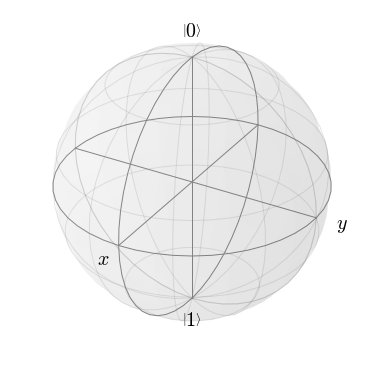

In [4]:
b.show()

The `show` command is just one of several methods belonging to the Bloch class:

<table>
  <tr>
    <th>Method</th>
    <th>Input Parameters (# = optional)</th>
    <th></th>
  </tr>
  <tr>
    <td>`add_points(pnts,#meth)`</td>
    <td>`pnts` list/array of (x,y,z) points, `meth=s` plots a collection of points using a single color. `meth=m` plots using multiple colors.</td>
    <td>Adds a single or set of data points to be plotted on the sphere.</td>
  </tr>
  <tr>
    <td>`add_states(state,#kind)`</td>
    <td>`state` Qobj or list/array of Qobj's representing state or density matrix of a two-level system, `kind` string specifying if state should be plotted as point ('point') or vector `vec` (default).</td>
    <td>Input multiple states as a list or array.</td>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>
</table>


As an example, we can add a single data point:

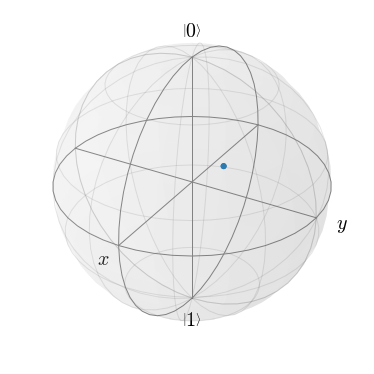

In [5]:
pnt = [1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]
b.add_points(pnt)
b.show()

and then a single vector:

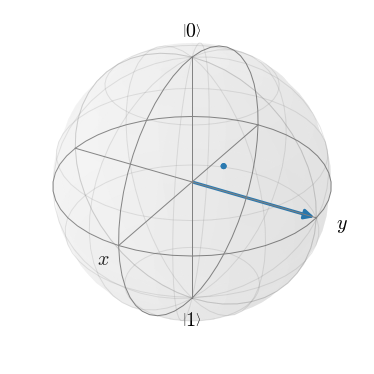

In [6]:
vec = [0,1,0]
b.add_vectors(vec)
b.show()

and then add another vector corresponding to the $\left|\rm up \right>$ state:

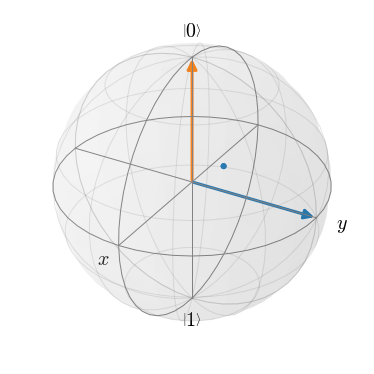

In [7]:
up = basis(2,0)
b.add_states(up)
b.show()

Notice that when we add more than a single vector (or data point), a different color will automatically be applied to the later data set (mod the length of the color list).  In total, the code for constructing our Bloch sphere with one vector, one state, and a single data point is:

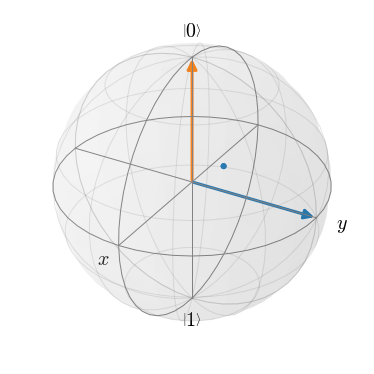

In [8]:
b = Bloch()
pnt = [1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]
b.add_points(pnt)
vec = [0,1,0]
b.add_vectors(vec)
up = basis(2,0)
b.add_states(up)
b.show()

We can also plot multiple points, vectors, and states at the same time by passing list or arrays instead of individual elements.  Before giving an example, we can use the `clear()` command to remove the current data from our Bloch sphere instead of creating a new instance:

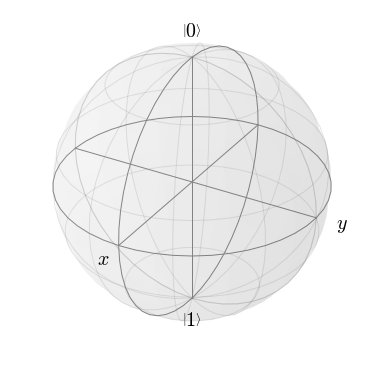

In [9]:
b.clear()
b.show()

Now on the same Bloch sphere, we can plot the three states associated with the x, y, and z directions:

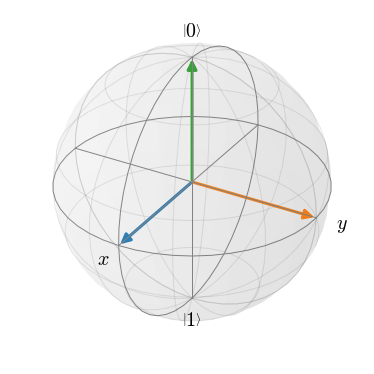

In [10]:
x = (basis(2,0)+(1+0j)*basis(2,1)).unit()
y = (basis(2,0)+(0+1j)*basis(2,1)).unit()
z = (basis(2,0)+(0+0j)*basis(2,1)).unit()
b.add_states([x,y,z])
b.show()

a similar method works for adding vectors:

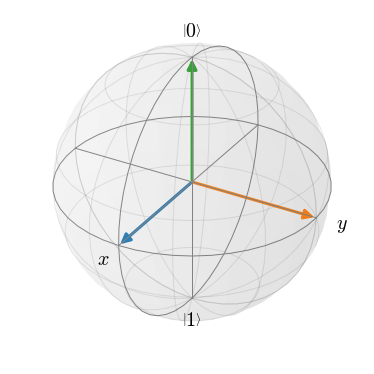

In [11]:
b.clear()
vec = [[1,0,0],[0,1,0],[0,0,1]]
b.add_vectors(vec)
b.show()

Adding multiple points to the Bloch sphere works slightly differently than adding multiple states or vectors.  For example, lets add a set of 20 points around the equator (after calling `clear`):

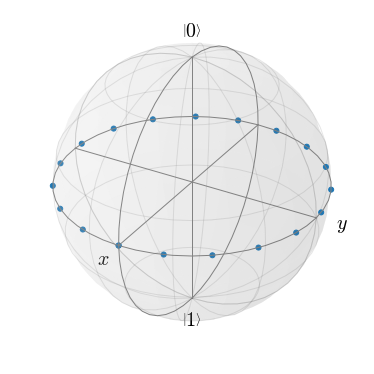

In [12]:
b.clear()
xp = [np.cos(th) for th in np.linspace(0, 2*pi, 20)]
yp = [np.sin(th) for th in np.linspace(0, 2*pi, 20)]
zp = np.zeros(20)
pnts = [xp, yp, zp]
b.add_points(pnts)
b.show()

Notice that, in contrast to states or vectors, each point remains the same color as the initial point.  This is because adding multiple data points using the add_points function is interpreted, by default, to correspond to a single data point (single qubit state) plotted at different times.  This is very useful when visualizing the dynamics of a qubit.  An example of this is given in the example .  If we want to plot additional qubit states we can call additional `add_points` functions:

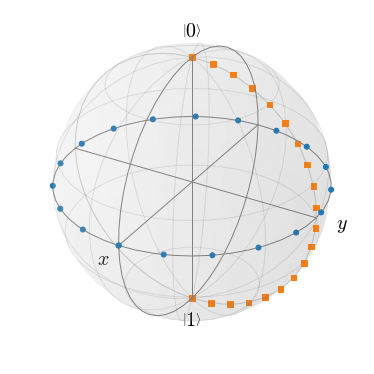

In [13]:
xz = np.zeros(20)
yz = [np.sin(th) for th in np.linspace(0, pi, 20)]
zz = [np.cos(th) for th in np.linspace(0, pi, 20)]
b.add_points([xz, yz, zz])
b.show()

The color and shape of the data points is varied automatically by the Bloch class.  Notice how the color and point markers change for each set of data.  Again, we have had to call ``add_points`` twice because adding more than one set of multiple data points is *not* supported by the ``add_points`` function.

What if we want to vary the color of our points.  We can tell the `Bloch` class to vary the color of each point according to the colors listed in the ``b.point_color`` list (see below):

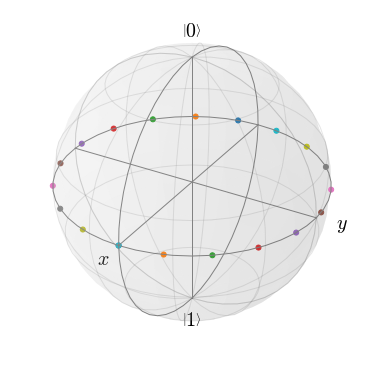

In [14]:
b.clear()
xp = [np.cos(th) for th in np.linspace(0, 2*pi, 20)]
yp = [sin(th) for th in np.linspace(0, 2*pi, 20)]
zp = np.zeros(20)
pnts = [xp, yp, zp]
b.add_points(pnts,'m') # <-- add a 'm' string to signify 'multi' colored points
b.sphere_color='0.8'
b.sphere_alpha=0.1
b.show()

Now, the data points cycle through a variety of predefined colors.  Now lets add another set of points,but this time we want the set to be a single color, representing say a qubit going from the $\left|\rm up\right>$ state to the $\left|\rm down\right>$ state in the y-z plane:

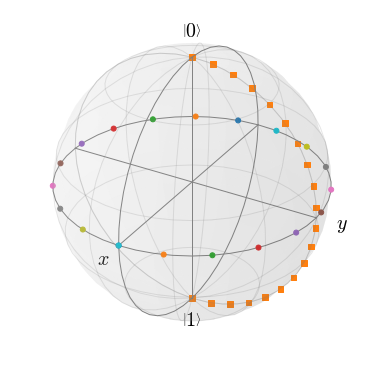

In [15]:
xz = np.zeros(20)
yz = [np.sin(th) for th in np.linspace(0, pi ,20)]
zz = [np.cos(th) for th in np.linspace(0, pi, 20)]
b.add_points([xz, yz, zz]) # no 'm'
b.show()

A more slick way of using this 'multi' color feature is given in the example, where we set the color of the markers as a function of time.

###Example: Coloring Points as a Function of Time
Here we take a Landau transistion example and label the position of the qubit on the Bloch sphere as a color of time.

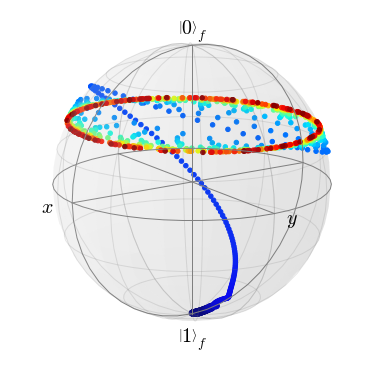

In [16]:
delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi # sweep rate
## arguments for Hamiltonian ##
H0 = delta/2.0 * sigmax()
H1 = v/2.0 * sigmaz()

H=[H0, [H1,'t']]
psi0 = basis(2,0)
## expectation operators ##
sm = destroy(2)
sx=sigmax();sy=sigmay();sz=sigmaz()
expt_ops = [sm.dag() * sm,sx,sy,sz]
## evolve the system ##
tlist = np.linspace(-10.0, 10.0, 1500)
results = mesolve(H, psi0, tlist, [], expt_ops)
p_ex1=results.expect[1]
p_ex2=results.expect[2]
p_ex3=results.expect[3]
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
b=Bloch()
## normalize colors to times in tlist ##
nrm=mpl.colors.Normalize(-2,10)
colors=cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([p_ex1,p_ex2,-p_ex3],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[20]
b.view=[-34,15]
b.zlpos=[1.1,-1.2]
b.zlabel=["$\left|0\\right>_{f}$","$\left|1\\right>_{f}$"]
## plot sphere ##
b.show()

In [17]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/guide.css", "r").read()
    return HTML(styles)
css_styling()